In [3]:
import sys 
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


Loading MNIST Data...

Loading Training Data...

Loading Testing Data...

Preparing Classifier Training and Validation Data...


In [5]:
#######################PLACEHOLDER 1 START #######################
# set the following two hyperparameters. 

nC=[1.0,3.0,5.0]
strKernel='poly'
#strKernel=['linear','poly','rbf','sigmoid']

#######################PLACEHOLDER 1 START #######################

In [8]:
# Pickle the Classifier for Future Use

def clf_per_nc(X_train, y_train, X_test, y_test, nC, strKernel):
    
    score_list=[]
    y_pred_list=[]
    accuracy_list=[]
    
    for n in nC:
        print('\n Training classifiers on training dataset... with nC = {}'.format(n))
        clf = svm.SVC(C=n, kernel=strKernel)
        #clf = svm.SVC(gamma=0.1, kernel='poly')

        clf.fit(X_train,y_train)

        filename='MNIST_SVM'+'_'+str(n)+'.pickle'
        with open(filename,'wb') as f:
            pickle.dump(clf, f)

        pickle_in = open(filename,'rb')
        clf = pickle.load(pickle_in)

        print('\nCalculating Accuracy of trained Classifier for validation data...')
        acc = round(clf.score(X_test,y_test),2)
        score_list.append(acc)

        print('\nMaking Predictions on Validation Data...')
        y_pred = clf.predict(X_test)
        y_pred_list.append(y_pred)

        print('\nCalculating Accuracy of Predictions...')
        accuracy = round(accuracy_score(y_test, y_pred),2)
        accuracy_list.append(accuracy)
    return score_list, y_pred_list, accuracy_list    

In [9]:
score_list, y_pred_list, accuracy_list = clf_per_nc(X_train, y_train, X_test, y_test, nC, strKernel='poly')


 Training classifiers on training dataset... with nC = 1.0

Calculating Accuracy of trained Classifier for validation data...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

 Training classifiers on training dataset... with nC = 3.0

Calculating Accuracy of trained Classifier for validation data...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

 Training classifiers on training dataset... with nC = 5.0

Calculating Accuracy of trained Classifier for validation data...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...


In [10]:
print(score_list)

[0.98, 0.98, 0.98]


In [11]:
# Get the plots for each N/K (# of neighbors)

from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [14]:
from bokeh.models import ColumnarDataSource, FactorRange

print(score_list)
print(accuracy_list)

p = figure(x_range=['1.0','3.0','5.0'], plot_height=200, title="Scores and Accuracy at different nC")
p.vbar(x=['1.0','3.0','5.0'], top=score_list, width=0.3)
p.circle(x=['1.0','3.0','5.0'], y=accuracy_list, size=20, color="navy", alpha=0.5)

p.xgrid.grid_line_color=None
p.y_range.start=0.9
p.y_range.end=1.0
p.xaxis.axis_label = 'nC'
p.yaxis.axis_label = 'Accuracy'
show(p)

[0.98, 0.98, 0.98]
[0.98, 0.98, 0.98]


In [15]:
# Confusion Matrix per Class (10)
from collections import defaultdict
def compute_metrics(test, pred):
    # Create the dictionary for each class
    conf_matrix={val:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for val in range(10)}
    
    for t,p in zip(test, pred):
        for val in range(10):
            # For each class we can calculate this
            if t==val and p==val: conf_matrix[val]['TP'] +=1
            if t!=val and p!=val: conf_matrix[val]['TN'] +=1
            if t!=val and p==val: conf_matrix[val]['FP'] +=1
            if t==val and p!=val: conf_matrix[val]['FN'] +=1
    
    #to Plot
    acc_dict=[]
    prec_dict=[]
    rec_dict=[]
    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, True Negative = {}, \
        False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        conf_mat=np.array([[v['TP'], v['FP']],
                           [v['FN'], v['TN']]])
        #plt.matshow(conf_mat)
        #plt.title('Confusion Matrix for Validation Data')
        #plt.colorbar()
        #plt.ylabel('True label')
        #plt.xlabel('Predicted label')
        #plt.show()
        #print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        #print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        #print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))
        
        #Store to get the final plot
        acc_dict.append(round((v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN'])) ,3))
        prec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FP']))  ,3))
        rec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FN']))  ,3))
        
    return acc_dict, prec_dict, rec_dict

In [18]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

#Get the Metrics per class here
for n in range(3):
    print("\n")
    print("#######################################################################################")
    print("#######################################################################################")
    print("#######################################################################################")
    print("\n")
    print("For penalty parameter = {}".format(nC[n]))
    print('\n SVM Trained Classifier Confidence: ',score_list[n])
    print('\n Predicted Values: ',y_pred_list[n])
    print('\n Accuracy of Classifier on Validation Image Data: ',accuracy_list[n])
    acc_dict, prec_dict, rec_dict = compute_metrics(y_test, y_pred_list[n])
    
    classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    properties = ['Accuracy', 'Precision', 'Recall']
    
    data = {'classes': classes,
            'Accuracy': acc_dict,
            'Precision': prec_dict,
            'Recall': rec_dict
           }
    palette = ["#c9d9d3", "#718dbf", "#e84d60"]
    x = [ (c, p) for c in classes for p in properties ]
    counts = sum(zip(data['Accuracy'], data['Precision'], data['Recall']), ()) # like an hstack

    source = ColumnDataSource(data=dict(x=x, counts=counts))

    p = figure(x_range=FactorRange(*x), plot_height=350, title="Metrics per Class",
               toolbar_location=None, tools="")

    p.vbar(x='x', top='counts', width=0.9, source=source,line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=properties, start=1, end=2))

    p.y_range.start = 0.95
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None

    show(p)
#######################PLACEHOLDER 2 ENDS ##################### 



#######################################################################################
#######################################################################################
#######################################################################################


For penalty parameter = 1.0

 SVM Trained Classifier Confidence:  0.98

 Predicted Values:  [3 4 1 ... 9 3 7]

 Accuracy of Classifier on Validation Image Data:  0.98
Confusion matrix for 0 : True Positive = 588, True Negative = 5403,         False Positive = 6, False Negative = 3
Confusion matrix for 1 : True Positive = 700, True Negative = 5285,         False Positive = 10, False Negative = 5
Confusion matrix for 2 : True Positive = 601, True Negative = 5372,         False Positive = 15, False Negative = 12
Confusion matrix for 3 : True Positive = 591, True Negative = 5382,         False Positive = 11, False Negative = 16
Confusion matrix for 4 : True Positive = 551, True Negative = 5417,         False Positive = 17, Fal



#######################################################################################
#######################################################################################
#######################################################################################


For penalty parameter = 3.0

 SVM Trained Classifier Confidence:  0.98

 Predicted Values:  [3 4 1 ... 9 3 7]

 Accuracy of Classifier on Validation Image Data:  0.98
Confusion matrix for 0 : True Positive = 588, True Negative = 5403,         False Positive = 6, False Negative = 3
Confusion matrix for 1 : True Positive = 700, True Negative = 5285,         False Positive = 10, False Negative = 5
Confusion matrix for 2 : True Positive = 601, True Negative = 5372,         False Positive = 15, False Negative = 12
Confusion matrix for 3 : True Positive = 591, True Negative = 5382,         False Positive = 11, False Negative = 16
Confusion matrix for 4 : True Positive = 551, True Negative = 5417,         False Positive = 17, Fal



#######################################################################################
#######################################################################################
#######################################################################################


For penalty parameter = 5.0

 SVM Trained Classifier Confidence:  0.98

 Predicted Values:  [3 4 1 ... 9 3 7]

 Accuracy of Classifier on Validation Image Data:  0.98
Confusion matrix for 0 : True Positive = 588, True Negative = 5403,         False Positive = 6, False Negative = 3
Confusion matrix for 1 : True Positive = 700, True Negative = 5285,         False Positive = 10, False Negative = 5
Confusion matrix for 2 : True Positive = 601, True Negative = 5372,         False Positive = 15, False Negative = 12
Confusion matrix for 3 : True Positive = 591, True Negative = 5382,         False Positive = 11, False Negative = 16
Confusion matrix for 4 : True Positive = 551, True Negative = 5417,         False Positive = 17, Fal

### Seems all three Penalty parameters give exactly the same performance 

In [19]:
# Predict on the test data
filename='MNIST_SVM_1.0.pickle'
pickle_in = open(filename,'rb')
clf = pickle.load(pickle_in)

In [20]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred=clf.predict(test_img)


Making Predictions on Test Input Images...


In [21]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc=accuracy_score(test_labels, test_labels_pred)


Calculating Accuracy of Trained Classifier on Test Data... 


In [23]:
print("#######################################################################################")
print("#######################################################################################")
print("#######################################################################################")

acc_dict, prec_dict, rec_dict = compute_metrics(test_labels, test_labels_pred)

classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
properties = ['Accuracy', 'Precision', 'Recall']

data = {'classes': classes,
        'Accuracy': acc_dict,
        'Precision': prec_dict,
        'Recall': rec_dict
       }
palette = ["#c9d9d3", "#718dbf", "#e84d60"]
x = [ (c, p) for c in classes for p in properties ]
counts = sum(zip(data['Accuracy'], data['Precision'], data['Recall']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Metrics per Class",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source,line_color="white",
   fill_color=factor_cmap('x', palette=palette, factors=properties, start=1, end=2))

p.y_range.start = 0.90
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)
#######################PLACEHOLDER 2 ENDS #####################

#######################################################################################
#######################################################################################
#######################################################################################
Confusion matrix for 0 : True Positive = 971, True Negative = 8996,         False Positive = 24, False Negative = 9
Confusion matrix for 1 : True Positive = 1125, True Negative = 8841,         False Positive = 24, False Negative = 10
Confusion matrix for 2 : True Positive = 1005, True Negative = 8947,         False Positive = 21, False Negative = 27
Confusion matrix for 3 : True Positive = 990, True Negative = 8970,         False Positive = 20, False Negative = 20
Confusion matrix for 4 : True Positive = 964, True Negative = 8996,         False Positive = 22, False Negative = 18
Confusion matrix for 5 : True Positive = 866, True Negative = 9088,         False Positive = 20, False Negative = 26
Confusion matrix for 6 : True Pos

### Clearly the SVM classifier does better than the KNN classifier

Actual value = 7, Predicted value = 4


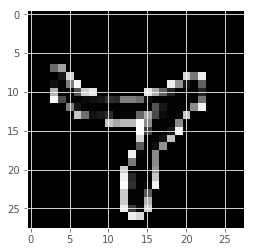



Actual value = 3, Predicted value = 1


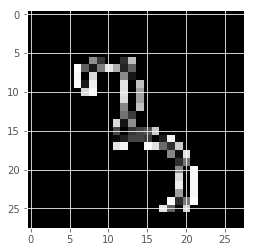



Actual value = 4, Predicted value = 2


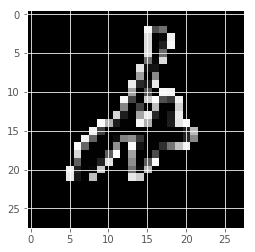



Actual value = 2, Predicted value = 7


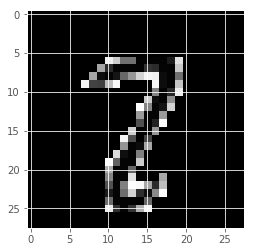



Actual value = 5, Predicted value = 3


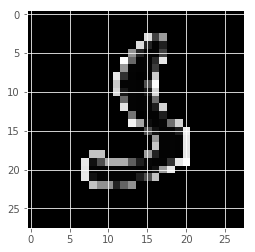

In [24]:
#######################PLACEHOLDER 4 START #####################
# randomly select and show 5 images that are misclassified
count=0
for idx,(t,p) in enumerate(zip(test_labels, test_labels_pred)):
        #if count>5:break
        for val in range(10):
            # For each class we can calculate this
            if t!=val and p==val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
            if t==val and p!=val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
        if count>=5:break
                
#######################PLACEHOLDER 4 END #####################

### Challenges
+ Mostly the biggest challenge here is deformations, and sometimes as it looks from the figure, they appear pretty confusing even to the naked eye